# Q7 Matrix Factorization in Graph Representation and Recommendation System

In [40]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

## Task 1 Graph Representation

Given the graph data `graph.npy`, please represent nodes `V` by minimizing `L_g`

Iteration: 0/1200
Iteration: 200/1200
Iteration: 400/1200
Iteration: 600/1200
Iteration: 800/1200
Iteration: 1000/1200
Final loss of Lg = 428.71881103515625


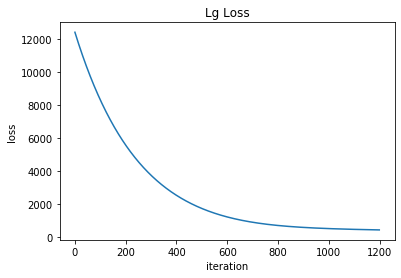

In [34]:
d = 100 # Choose d = 100
A = torch.from_numpy(np.load("graph/graph.npy")) # shape = (500, 500)
V = torch.rand(A.shape[0], d, requires_grad=True) # Initialize V randomly


Lg_history = [] # the loss history of Lg
learning_rate = 1e-3 
iteration = 1200

for t in range(iteration):

    A_pred = V.mm(V.t())

    loss = (A - A_pred).pow(2).sum().sqrt()
    Lg_history.append(loss)
    loss.backward()
    
    if t%200 == 0:
        print("Iteration: %s/%s" % (t, iteration))
        
    if t == (iteration - 1):
        print("Final loss of Lg = %s" % loss.item())

    with torch.no_grad():
        V -= learning_rate * V.grad
        V.grad.zero_()


plt.title("Lg Loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(range(iteration), Lg_history)
plt.show()

## Task 2 User-Movie RecSys

Given the rating data `rating.csv`, please represent users $U$ and movies $V$ by minimizing $L_r$

In [51]:
df = pd.read_csv("RecSys/rating.csv") # UserID, MovieID, Rating
df.head()

,UserID,MovieID,Rating
0,1,1836,5
1,1,1097,4
2,1,2028,5
3,1,527,5
4,1,2918,4


In [57]:
# Transform rating.csv dataframe to rating matrix X
crosstab = pd.crosstab(df.UserID, df.MovieID)
print(crosstab.shape) # crosstab's shape = (|Users|, |Movies|)

(6040, 3672)


In [71]:
for index, row in df.iterrows():
    crosstab.loc[row['UserID'], row['MovieID']] = row['Rating']

Iteration: 0/1500
Iteration: 100/1500
Iteration: 200/1500
Iteration: 300/1500
Iteration: 400/1500
Iteration: 500/1500
Iteration: 600/1500
Iteration: 700/1500
Iteration: 800/1500
Iteration: 900/1500
Iteration: 1000/1500
Iteration: 1100/1500
Iteration: 1200/1500
Iteration: 1300/1500
Iteration: 1400/1500
Final loss of Lr = 4710.68212890625


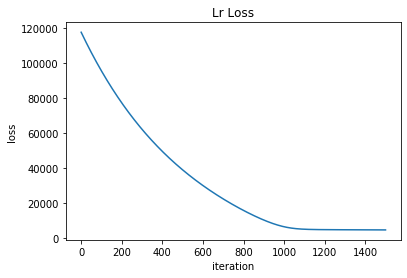

In [92]:
d = 100
X = torch.from_numpy(crosstab.to_numpy()).cuda()
U = torch.rand(X.shape[0], d).cuda() # User matrix shape = (|U|,  d)
U.requires_grad = True
V = torch.rand(X.shape[1], d).cuda() # Movie matrix shape = (|V|, d)
V.requires_grad = True

Lr_history = [] # the loss history of Lr
learning_rate = 1e-3 
iteration = 1500

optimizer = torch.optim.SGD([U,V], lr=learning_rate)

for t in range(iteration):

    X_pred = U.mm(V.t())

    loss = (X - X_pred).pow(2).sum().sqrt()
    Lr_history.append(loss)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    if t%100 == 0:
        print("Iteration: %s/%s" % (t, iteration))
        
    if t == (iteration - 1):
        print("Final loss of Lr = %s" % loss.item())
    
    
    optimizer.step()


plt.title("Lr Loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(range(iteration), Lr_history)
plt.show()

## Task 3 User-Movie RecSys with Movie Tags

Given the rating data `rating.csv` and the movie data `movie.csv`, please represent users U, movies $V$ , and tags $T$ by minimizing $L_t$.

In [120]:
movie_df = pd.read_csv("RecSys/movie.csv", index_col=0) # MovieID, Tags
movie_df

,Tags
MovieID,
1,Animation|Children's|Comedy
2,Adventure|Children's|Fantasy
3,Comedy|Romance
4,Comedy|Drama
5,Comedy
...,...
3948,Comedy
3949,Drama
3950,Drama


In [129]:
tags = movie_df["Tags"].str.get_dummies("|")
movie_list = crosstab.columns.values.tolist()
Y = movie_df.join(tags).drop('Tags', axis=1).loc[movie_list]
Y.shape # shape = (|V|, |T|)

(3672, 18)

In [130]:
d = 100
X = torch.from_numpy(crosstab.to_numpy()).cuda() # Rating shape = (|U|, |V|)
U = torch.rand(X.shape[0], d).cuda() # User matrix shape = (|U|,  d)
U.requires_grad = True
V = torch.rand(X.shape[1], d).cuda() # Movie matrix shape = (|V|, d)
V.requires_grad = True

Y = torch.from_numpy(Y.to_numpy().T).cuda() # Movie tags shape = (|T|, |V|)
T = torch.rand(Y.shape[0], d).cuda() # Tags shape = (|T|, d)
T.requires_grad = True

Iteration: 0/1500
Iteration: 100/1500
Iteration: 200/1500
Iteration: 300/1500
Iteration: 400/1500
Iteration: 500/1500
Iteration: 600/1500
Iteration: 700/1500
Iteration: 800/1500
Iteration: 900/1500
Iteration: 1000/1500
Iteration: 1100/1500
Iteration: 1200/1500
Iteration: 1300/1500
Iteration: 1400/1500
Final loss of Lt = 4774.3779296875


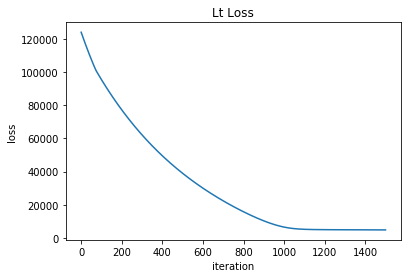

In [131]:
Lt_history = [] # the loss history of Lt
learning_rate = 1e-3 
iteration = 1500

optimizer = torch.optim.SGD([U,V,T], lr=learning_rate)

for t in range(iteration):

    X_pred = U.mm(V.t())
    Y_pred = T.mm(V.t())

    loss = (X - X_pred).pow(2).sum().sqrt() + (Y - Y_pred).pow(2).sum().sqrt()
    Lt_history.append(loss)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    if t%100 == 0:
        print("Iteration: %s/%s" % (t, iteration))
        
    if t == (iteration - 1):
        print("Final loss of Lt = %s" % loss.item())
    
    
    optimizer.step()


plt.title("Lt Loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(range(iteration), Lt_history)
plt.show()